In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Question 1
### Develop code which accepts a square matrix of size 'MxM' and swaps elements from the left diagonal with right diagonal or vice-versa (Use Numpy to create the matrix).

In [2]:
print ('Enter size of square matrix: ')
M = int(input())
N = np.zeros([M, M])

for i in range(M):
    for j in range(M):
        print ('Enter element at ' + str(i) + ', ' + str(j) + ': ')
        N[i, j] = input()

print (N)

Enter size of square matrix: 
4
Enter element at 0, 0: 
1
Enter element at 0, 1: 
2
Enter element at 0, 2: 
3
Enter element at 0, 3: 
4
Enter element at 1, 0: 
5
Enter element at 1, 1: 
6
Enter element at 1, 2: 
7
Enter element at 1, 3: 
8
Enter element at 2, 0: 
9
Enter element at 2, 1: 
10
Enter element at 2, 2: 
11
Enter element at 2, 3: 
12
Enter element at 3, 0: 
13
Enter element at 3, 1: 
14
Enter element at 3, 2: 
15
Enter element at 3, 3: 
16
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


In [3]:
def diagonal_swap(array):
    newarray = np.zeros([M, M], dtype=N.dtype)
    for i in range(M):
        for j in range(M):
            if (i+j == M-1):
                newarray[i, j] = array[i, M-1-j]
            elif (i==j):
                newarray[i, j] = array[i, M-1-j]
            else:
                newarray[i, j] = array [i, j]
    return newarray

In [4]:
print (diagonal_swap(N))

[[ 4.  2.  3.  1.]
 [ 5.  7.  6.  8.]
 [ 9. 11. 10. 12.]
 [16. 14. 15. 13.]]


In [5]:
#Just to restore the test matrix quickly
N = np.arange(1, 17).reshape(4, 4)
N

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

## Question 2
### Develop code which accepts a text file as input and prints the text in a new file with the first alphabet of each word capitalized. Also, print the total number of white spaces in the new file.

In [6]:
file = open("Assignment1_Q2.txt", "r+")
txt = file.read()    #For some reason, working directly with file.read() as a string wasn't updating count
print (txt)
print()

txt2 = txt.title()
print (txt2)
print()

count = 0
for i in range(len(txt2)):
    if txt2[i]==" ":
        count +=1
print ("Number of spaces:", count)

hello, how are you?
today, we are testing a numpy program as a part of our assignment.

Hello, How Are You?
Today, We Are Testing A Numpy Program As A Part Of Our Assignment.

Number of spaces: 15


## Question 3
### Develop code using numpy, to generate a random numbers series having total 1000 numbers (only integers in range 1 to 100), and calculate the frequency of the unique items in the series. Subsequently, convert this frequency table into a Histogram.

In [7]:
s = pd.Series(np.random.randint(1, 101, 1000))
#Series of 1000 numbers ranging from 1 (inclusive) to 101 (exclusive)
s

0       1
1       5
2      11
3      78
4      60
       ..
995    57
996     6
997    68
998    27
999    63
Length: 1000, dtype: int32

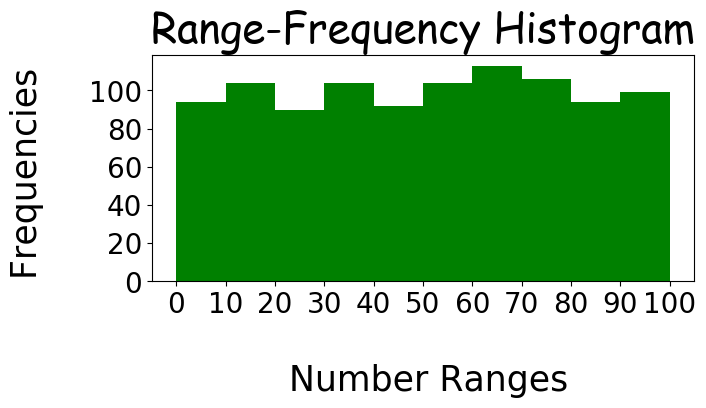

In [8]:
plt.figure(figsize=(7, 3), dpi=100)

bins = list(range(0, 101, 10))
plt.hist(s, color="g", bins=bins)

plt.title('Range-Frequency Histogram', fontdict={'fontname':'Comic Sans MS', 'size':30})
plt.xlabel('\n Number Ranges', fontdict={'size':25})
plt.ylabel('Frequencies \n', fontdict={'size':25})

plt.xticks(bins, fontsize=20)
plt.yticks(fontsize=20)

plt.show()
#Not sure why the histogram is coming out like this

## Question 4
### In above frequency table representing series of random numbers, retain only top 5 most frequent values as they are and replace everything else as ‘Other’, and show them on the bar chart.

In [9]:
frequencies = pd.DataFrame(s.value_counts(sort=True))   #type(s1.value_counts()) = pd.Series, sort=True is the default value
#A table of the numbers with their frequencies from top to bottom

frequencies.to_csv ('Assignment1_Q3.csv')
#Doing this to be able to rename the Number column as it is being treated as the index right now

freq = pd.read_csv('Assignment1_Q3.csv')
freq.columns = ['Number', 'Frequency']

freq

,Number,Frequency
0,4,18
1,14,18
2,36,17
3,32,15
4,55,15
...,...,...
95,24,5
96,47,5
97,98,5
98,16,4


In [10]:
sum_other = freq.iloc[:, 1].sum() - freq.iloc[0:5, 1].sum()
#Did this as freq.iloc[5:-1, 1].sum() was returning 910 by excluding the last row
sum_other

917

In [11]:
freq2 = pd.DataFrame(freq.iloc[0:5, 0:2])    #Had to convert it from a series to a dataframe
freq2

,Number,Frequency
0,4,18
1,14,18
2,36,17
3,32,15
4,55,15


In [12]:
freq2.loc[5, :] = ["Other", sum_other]
freq2.sort_values(by='Frequency', inplace=True)
freq2

,Number,Frequency
3,32,15.0
4,55,15.0
2,36,17.0
0,4,18.0
1,14,18.0
5,Other,917.0


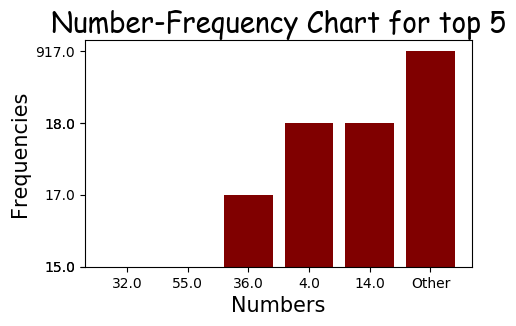

In [13]:
#Now plotting a bar chart of this

x = []
for i in list(freq2['Number'].values):
    x.append(str(i))
    
y = []
for j in list(freq2['Frequency'].values):
    y.append(str(j))
    
#Had to define x and y as empty lists and fill them element-wise, as directly passing freq2['Number'].values and 
#freq2['Frequency'].values (or varying them slightly) in plt.bar() kept giving a TypeError
#Even defining x=list(freq2['Number'].values) and y=list(freq2['Frequency'].values) kept giving a TypeError saying that
#the x-type (object) and y-type (float64) are incompatible

plt.figure(figsize=(5, 3), dpi=100)
plt.bar(x, y, color="maroon", label="Top 5 and Others")

plt.title('Number-Frequency Chart for top 5', fontdict={'fontname':'Comic Sans MS', 'size':20})
plt.xlabel('Numbers', fontdict={'size':15})
plt.ylabel('Frequencies', fontdict={'size':15})

plt.xticks(x)
plt.yticks(y)    #For some reason, it's messing up the order of the elements in list y
plt.show()

In [14]:
x

['32.0', '55.0', '36.0', '4.0', '14.0', 'Other']

In [15]:
y

['15.0', '15.0', '17.0', '18.0', '18.0', '917.0']

## Code removed from Q1

def left_swap(array):
    newarray = np.zeros([M, M], dtype=N.dtype)
    for i in range(M):
        for j in range(M):
            newarray[i, j] = array[j, i]    #Can use the temp method instead to save space
    return newarray
    #return (array.T)    The above code was returning the original array instead of the transpose but not anymore
    
print (N)
print (left_swap(N))

def right_swap(array):
    newarray = np.zeros([M, M], dtype=N.dtype)    
    for i in range(M):
        for j in range(M):
            newarray[i][j] = array[(M-1) - j][(M-1) - i];    #Can use the temp method instead to save space            
    return newarray

print (N_copy)
print (right_swap(N_copy))

#Just to restore the test matrices quickly
N = np.arange(1, 17).reshape(4, 4)
N_copy = N.copy()
N

## Code removed from Q3

print (s.unique())     No use running this
print (s.nunique())    Or this

#Ended up adding back, the code lines below
frequencies = pd.DataFrame(s.value_counts(sort=True))    #type(s1.value_counts()) = pd.Series, sort=True is the default value
A table of the numbers with their frequencies from top to bottom
frequencies

frequencies.to_csv ('Assignment1_Q3.csv')
Doing this to be able to rename the Number column as it is being treated as the index right now

freq = pd.read_csv('Assignment1_Q3.csv')
freq.columns = ['Number', 'Frequency']
freq